# Classification supervisée  à partir des images

## Sommaire

### Importation des modules utilisés

### Chargement des données

### Création d'un DataFrame contenant les chemins d'accès aux images et les identifiants uniques des produits

### Création du modèle de classification

### Approche préparation initiale des images

- Division des données en ensemble d'entraînement et de test

* Prépare les données pour l'entraînement 

* Diviser les données d'images et les labels correspondants en ensembles d'entraînement et de validation

* Création du modèle et initialisation des callbacks

* Entraînement du modèle et calcul du temps d'entraînement

- Évaluation du modèle sur les données d'entraînement et de validation

- Visualisation de la progression de l'apprentissage du modèle

- Extraction des étiquettes prédites et réelles pour l'ensemble de validation

- Création et affichage de la matrice de confusion

- Transformation de la matrice de confusion pour une meilleure correspondance des clusters

- Évaluation des performances du modèle avec une matrice de confusion et un rapport de classification transformés

- Visualisation de la matrice de confusion à l'aide de la bibliothèque Seaborn

- Réaliser des prédictions avec le modèle sur l'ensemble de test

- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

- Visualisation des prédictions du modèle sur un échantillon d'images de test

### Approche ImageDatagenerator avec data augmentation

- Randomisation de l'ordre des images dans les données

- Génération des batches d'images pour l'entraînement du modèle à partir des données fournies

- Préparation des générateurs de données d'entraînement, de validation et de test avec augmentation des données pour l'entraînement

- Création du modèle et initialisation des callbacks

- Entraînement du modèle et calcul du temps d'entraînement

- Évaluation du modèle sur les données d'entraînement et de validation

- Évaluation du modèle sur les données de validation et de test en utilisant les meilleurs poids sauvegardés

- Visualisation de la progression de l'apprentissage du modèle

- Réaliser des prédictions avec le modèle sur l'ensemble de test

- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

### Approche nouvelle par Dataset sans data augmentation

- Création de sous repertoires de classes

- Réorganiser les images en les déplaçant dans des dossiers spécifiques

- Récupération de la liste des images d'entraînement et de test à partir des répertoires spécifiés

- Génération d'un ensemble de données d'images à partir d'un répertoire

- Création des ensembles de données d'entraînement, de validation et de test

- Visualisation d'un échantillon de 16 images du jeu d'entraînement en grille 4x4

- Création du modèle et initialisation des callbacks

- Configurer le modèle pour l'entraînement

- Entraîner le modèle en utilisant les données d'entraînement

- Évaluation du modèle sur les données d'entraînement et de validation

- Évaluation du modèle sur les données de validation et de test en utilisant les meilleurs poids sauvegardés

- Visualisation de la progression de l'apprentissage du modèle

- Réaliser des prédictions avec le modèle sur l'ensemble de test

- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

### Approche nouvelle par Dataset avec data augmentation intégrée au modèle

- Redimensionnement et rééchelonnage des images

- Création du modèle avec augmentation des données et VGG16 comme base pré-entraînée

- Création du modèle et initialisation des callbacks

- Entraîner le modèle en utilisant les données d'entraînement

- Évaluation du modèle sur les données d'entraînement et de validation

- Évaluation du modèle sur les données de validation et de test en utilisant les meilleurs poids sauvegardés

- Visualisation de la progression de l'apprentissage du modèle

- Réaliser des prédictions avec le modèle sur l'ensemble de test

- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

- Visualisation des prédictions du modèle sur 10 images de l'ensemble de test

## Importation des modules utilisés

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import Model
import time
from plot_keras_history import show_history, plot_history
from sklearn import metrics
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, Rescaling

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
pip install --user numpy==1.22.2

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install plot-keras-history

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 322.1/322.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9459 sha256=ff4ee663a9576bcdce302d5318d2bd5764008c76d09ff1c733537ad68c83154a
  Stored in directory: c:\users\tidib\appdata\local\pip\cache\wheels\aa\0a\0f\0775c812151040fb695c0890d902810a9d69e1db50181e5328
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320501 sha256=6e2be66fb1413cc2784de145f7d4225121f02d55fefe36baa45252d6a00d0f14
  Stored in directory: c:\users\t

In [1]:
conda update notebook

Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==custom=py39_2
  - defaults/win-64::boto3==1.24.28=py39haa95532_0
  - defaults/win-64::datashader==0.14.1=py39haa95532_0
  - defaults/win-64::qt==5.9.7=vc14h73c81de_0
  - defaults/win-64::_anaconda_depends==2023.07=py39_1



Solving environment: ...working... 
  - defaults/win-64::conda-content-trust-0.1.3-py39haa95532_0, defaults/win-64::cryptography-39.0.1-py39h21b164f_0
  - defaults/noarch::conda-content-trust-0.1.1-pyhd3eb1b0_0, defaults/win-64::cryptography-41.0.2-py39h31511bf_0done

## Package Plan ##

  environment location: C:\Users\tidib\anaconda3

  added / updated specs:
    - notebook


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiobotocore-2.4.2          |   py39haa95532_0         107 KB
    botocore-1.27.59           |   py39haa95532_0         5.7 MB
    cryptography-39.0.1        |   py39h21b164f_0         1.0 MB
    daal4py-2023.1.1           |   py39h757b272_0         9.7 MB
    dal-2023.1.1               |   h59b6b97_48681        26.4 MB
    fsspec-2023.3.0            |   py39haa95532_0         234 KB
    gensim-4.3.0               |   py39hd77b12b_0        21.6 MB
    jupyter_client-

## Chargement des données

In [2]:
flipkart_img_df = pd.read_csv('./data/Flipkart/flipkart_img_df.csv')

In [3]:
flipkart_id_cat_df = pd.read_csv('./data/Flipkart/flipkart_id_cat_df.csv')

In [4]:
image_directory = "./data/Flipkart/Images/"

# La liste des images
image_list = os.listdir(image_directory)
(len(image_list))

1050

## Création d'un DataFrame contenant les chemins d'accès aux images et les identifiants uniques des produits

In [5]:
data = pd.DataFrame()
data["image_path"] = image_list
data['uniq_id'] = data['image_path'].str.split('.jpg' , n = 1, expand=True)[0]
data

image_path                           uniq_id
0     009099b1f6e1e8f893ec29a7023153c4.jpg  009099b1f6e1e8f893ec29a7023153c4
1     0096e89cc25a8b96fb9808716406fe94.jpg  0096e89cc25a8b96fb9808716406fe94
2     00cbbc837d340fa163d11e169fbdb952.jpg  00cbbc837d340fa163d11e169fbdb952
3     00d84a518e0550612fcfcba3b02b6255.jpg  00d84a518e0550612fcfcba3b02b6255
4     00e966a5049a262cfc72e6bbf68b80e7.jpg  00e966a5049a262cfc72e6bbf68b80e7
...                                    ...                               ...
1045  feefbdff924dd6b7cc266449c9a36d69.jpg  feefbdff924dd6b7cc266449c9a36d69
1046  ff24511994fc459d04145231c8876d6c.jpg  ff24511994fc459d04145231c8876d6c
1047  ffbf3794aa8cb6bb8d3f313d0a549a09.jpg  ffbf3794aa8cb6bb8d3f313d0a549a09
1048  ffc2e1fc7c886ec09a331040ada038aa.jpg  ffc2e1fc7c886ec09a331040ada038aa
1049  fffa2117a4006d4a848eb7d5b80d4816.jpg  fffa2117a4006d4a848eb7d5b80d4816

[1050 rows x 2 columns]

In [6]:
# Jointure du DataFrame de données avec le DataFrame des catégories de produits en utilisant l'identifiant unique des produits
data = data.merge(flipkart_id_cat_df, how = 'left', on = 'uniq_id')
data.head()

image_path                           uniq_id  \
0  009099b1f6e1e8f893ec29a7023153c4.jpg  009099b1f6e1e8f893ec29a7023153c4   
1  0096e89cc25a8b96fb9808716406fe94.jpg  0096e89cc25a8b96fb9808716406fe94   
2  00cbbc837d340fa163d11e169fbdb952.jpg  00cbbc837d340fa163d11e169fbdb952   
3  00d84a518e0550612fcfcba3b02b6255.jpg  00d84a518e0550612fcfcba3b02b6255   
4  00e966a5049a262cfc72e6bbf68b80e7.jpg  00e966a5049a262cfc72e6bbf68b80e7   

      product_category_tree  
0                   Watches  
1          Kitchen & Dining  
2           Home Furnishing  
3  Beauty and Personal Care  
4                 Computers

In [7]:
# Encodage des catégories de produits en étiquettes numériques pour la classification
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["product_category_tree"])

## Création du modèle de classification

In [8]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

## Approche préparation initiale des images

- Division des données en ensemble d'entraînement et de test

In [9]:
data_train, data_test = train_test_split(data, stratify=data['label'], test_size=0.2, random_state=0)
data_train.shape

(840, 4)

- Prépare les données pour l'entraînement 

In [10]:
# Increase the maximum allowed image pixels
Image.MAX_IMAGE_PIXELS = None

def image_prep_fct(data) :
    prepared_images = []
    for image_file in data['image_path'] :
        image_file = image_directory + image_file
        img = load_img(image_file, target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
    prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np = image_prep_fct(data)
print(images_np.shape)

images_np_test = image_prep_fct(data_test)
print(images_np_test.shape)

(1050, 224, 224, 3)
(210, 224, 224, 3)


In [11]:
# Importation des images préparées comme caractéristiques d'entrée (X)
X = images_np

# Conversion des étiquettes de classes en encodage one-hot pour être utilisées comme cibles (y)
y = to_categorical(data['label'])

# Importation des images de test comme caractéristiques d'entrée pour l'ensemble de test (X_test)
X_test = images_np_test

# Conversion des étiquettes de classes de l'ensemble de test en encodage one-hot (y_test)
y_test = to_categorical(data_test['label'])

# Affichage des cibles y
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Diviser les données d'images et les labels correspondants en ensembles d'entraînement et de validation

In [12]:
# Division des données en ensembles d'entraînement et de validation.
# L'argument 'stratify' garantit que la répartition des classes est la même dans les ensembles d'entraînement et de validation qu'elle l'est dans l'ensemble de données original.
# L'argument 'test_size' spécifie que 25% des données seront utilisées pour la validation.
# L'argument 'random_state' est utilisé pour la reproductibilité des résultats. Le même état aléatoire produira la même division des données.
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Affiche la forme de l'ensemble d'entraînement pour vérifier que les données ont été divisées correctement.
X_train.shape

(787, 224, 224, 3)

- Création du modèle et initialisation des callbacks

In [18]:
# Création du modèle
model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

- Entraînement du modèle et calcul du temps d'entraînement

In [19]:
# Entraîner sur les données d'entraînement (X_train, y_train)
temps1 = time.time()

history1 = model1.fit(X_train, y_train, epochs=20, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)
duration1 =time.time()-temps1

print("Temps d'entraînement du modèle : ", "%15.2f" % duration1, "secondes") 

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 5.2068 - accuracy: 0.4282 
Epoch 1: val_loss improved from inf to 1.26477, saving model to .\model1_best_weights.h5
13/13 [==============================] - 471s 36s/step - loss: 5.2068 - accuracy: 0.4282 - val_loss: 1.2648 - val_accuracy: 0.7643
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 2.0046 - accuracy: 0.6645
Epoch 2: val_loss improved from 1.26477 to 1.08305, saving model to .\model1_best_weights.h5
13/13 [==============================] - 163s 13s/step - loss: 2.0046 - accuracy: 0.6645 - val_loss: 1.0831 - val_accuracy: 0.8175
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 1.1896 - accuracy: 0.7471 
Epoch 3: val_loss improved from 1.08305 to 1.07041, saving model to .\model1_best_weights.h5
13/13 [==============================] - 166s 13s/step - loss: 1.1896 - accuracy: 0.7471 - val_loss: 1.0704 - val_accuracy: 0.8175
Epoch 4/20
13/13 [==============================

- Évaluation du modèle sur les données d'entraînement et de validation

In [20]:
# Score du dernier epoch

# Évaluer le modèle sur l'ensemble d'entraînement
# X_train et y_train sont les données et labels d'entraînement
# Cette fonction renvoie la valeur de la fonction de coût (loss) et d'autres métriques (ici, l'accuracy)
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)

# Imprimer la précision de l'entraînement, formatée avec quatre décimales
print("Training Accuracy   : {:.4f}".format(accuracy))
print()

# Évaluer le modèle sur l'ensemble de validation
# X_val et y_val sont les données et labels de validation
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)

# Imprimer la précision de la validation, formatée avec quatre décimales
print("Validation Accuracy :  {:.4f}".format(accuracy))

25/25 [==============================] - 124s 5s/step - loss: 0.0152 - accuracy: 0.9949
Training Accuracy   : 0.9949

9/9 [==============================] - 42s 5s/step - loss: 1.0545 - accuracy: 0.8479
Validation Accuracy :  0.8479


- Visualisation de la progression de l'apprentissage du modèle

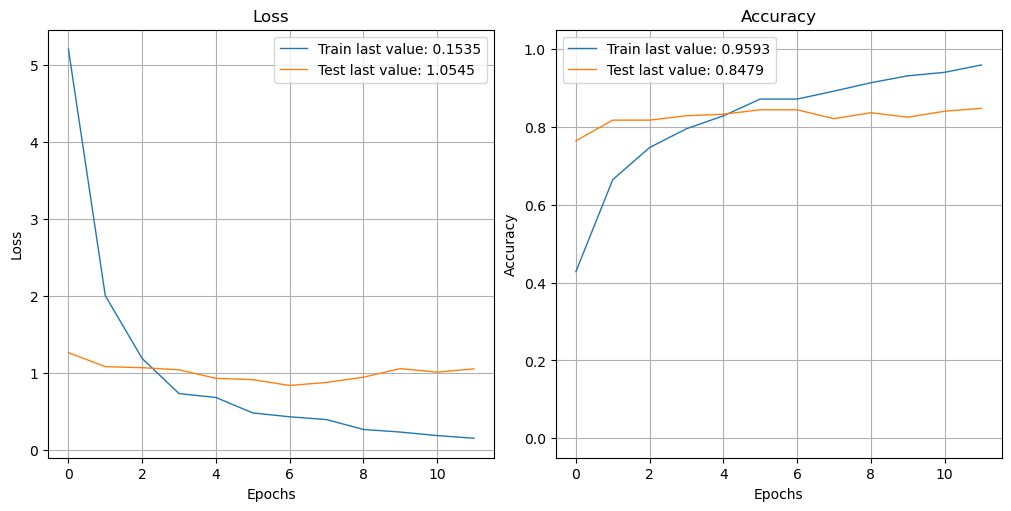

In [21]:
show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

- Extraction des étiquettes prédites et réelles pour l'ensemble de validation

In [22]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

9/9 [==============================] - 39s 4s/step
[3 3 1 4 3 1 5 0 3 0 0 4 6 5 0 6 5 0 2 6 2 2 1 0 4 5 4 6 2 2 0 2 1 3 2 0 4
 0 0 1 6 6 1 1 4 4 0 6 2 3 1 2 3 6 1 4 6 1 4 0 1 6 5 1 0 6 5 3 6 0 3 4 0 0
 4 2 4 4 6 3 1 4 5 5 1 2 1 0 3 5 5 2 3 1 6 3 6 5 5 1 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 5 6 1 4 2 1 4 0 3 3 2 3 4 2 0 3 3 0 5 1 3 3 1 5 0 1 0 3 5 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 2 5 5 3 5 1 2 4 3 1 2 5 5 2 2 0 0 3 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 5 0 2 2 1 6 2 0 6 4 3 3 5 3 4 1 4 0 5 5 5 2 5 6 3 6 4 6 2
 5 4 1 4 6 6 4 1 3 6 5 6 3 6 3 2 3 2 5 6 0 2 4 5 0 4 3 0 2 4 4 2 2 5 2 6 1
 6 6 2 1]

[3 3 1 4 3 1 1 0 3 0 0 4 6 5 0 6 5 0 2 1 4 2 1 0 4 5 0 6 2 2 0 2 3 3 2 5 4
 0 0 1 6 6 1 2 4 4 0 6 2 0 1 2 5 6 1 4 6 1 4 0 1 6 5 1 0 6 5 3 6 0 0 4 0 3
 4 2 4 0 6 3 1 2 5 5 1 2 1 0 3 3 5 2 3 6 6 4 6 5 5 1 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 5 6 1 4 2 1 4 0 3 5 2 3 4 2 0 3 3 4 5 1 1 3 1 5 0 1 1 4 5 3 3 1 5 5
 1 2 6 0 5 1 1 0 1 3 0 0 1 2 5 5 3 5 2 2 4 3 1 2 5 5 2 5 4 4 3 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 2 0 2 5 1 6 2 0 6 4 3

- Création et affichage de la matrice de confusion

In [23]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[30  1  0  3  3  1  0]
 [ 0 32  2  1  0  1  1]
 [ 0  0 32  2  1  3  0]
 [ 4  2  0 28  2  2  0]
 [ 4  0  1  0 33  0  0]
 [ 0  1  1  2  0 33  0]
 [ 0  1  0  0  0  1 35]]


- Transformation de la matrice de confusion pour une meilleure correspondance des clusters

In [24]:
def conf_mat_transform(y_true,y_pred):
    """
    Transforme les étiquettes prédites pour qu'elles correspondent le mieux aux étiquettes réelles.
    
    Cette fonction est utile lorsqu'on utilise des algorithmes de clustering (comme k-means) où 
    les étiquettes attribuées aux clusters peuvent ne pas correspondre aux étiquettes réelles.

    Paramètres:
    - y_true : Les étiquettes réelles.
    - y_pred : Les étiquettes prédites.

    Retour:
    - Les étiquettes prédites transformées.
    """
    
    # Calcul de la matrice de confusion entre les étiquettes réelles et prédites
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # Trouver la correspondance la plus fréquente entre étiquettes prédites et réelles
    corresp = np.argmax(conf_mat, axis=0)
    print("Correspondance des clusters :", corresp)

    # Création d'un DataFrame pour faciliter la transformation des étiquettes prédites
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    # Appliquer la transformation pour chaque étiquette prédite en utilisant le tableau 'corresp'
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: corresp[x])
    
    # Retourner les étiquettes prédites transformées
    return labels['y_pred_transform']

- Évaluation des performances du modèle avec une matrice de confusion et un rapport de classification transformés

In [25]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[30  1  0  3  3  1  0]
 [ 0 32  2  1  0  1  1]
 [ 0  0 32  2  1  3  0]
 [ 4  2  0 28  2  2  0]
 [ 4  0  1  0 33  0  0]
 [ 0  1  1  2  0 33  0]
 [ 0  1  0  0  0  1 35]]

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.86      0.86      0.86        37
           2       0.89      0.84      0.86        38
           3       0.78      0.74      0.76        38
           4       0.85      0.87      0.86        38
           5       0.80      0.89      0.85        37
           6       0.97      0.95      0.96        37

    accuracy                           0.85       263
   macro avg       0.85      0.85      0.85       263
weighted avg       0.85      0.85      0.85       263



- Visualisation de la matrice de confusion à l'aide de la bibliothèque Seaborn

In [26]:
categories = ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs',
             'Home Furnishing', 'Kitchen & Dining', 'Watches']

<AxesSubplot:>

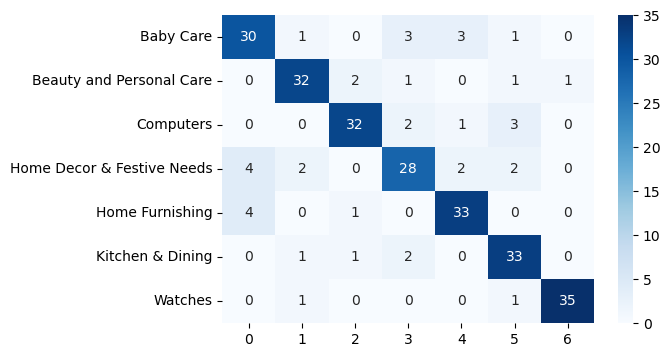

In [27]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in categories],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# Enregistrer la figure
plt.savefig('heatmap_1.png')

La matrice de confusion réaffirme les performances solides de notre modèle. Avec une erreur maximale de seulement 2 sur 35 pour chaque catégorie, le modèle démontre une capacité impressionnante à classifier correctement les images à travers les différentes classes.

- Réaliser des prédictions avec le modèle sur l'ensemble de test

In [28]:
predictions1 = model1.predict(X_test)

7/7 [==============================] - 27s 4s/step


- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

In [29]:
labels_pred = [categories[np.argmax(predictions1[i])] for i in range(len(predictions1))]
labels = data_test['product_category_tree']
score1_ari = metrics.adjusted_rand_score(labels, labels_pred)
print("ARI : ", score1_ari)

ARI :  0.9005857438619


- Visualisation des prédictions du modèle sur un échantillon d'images de test

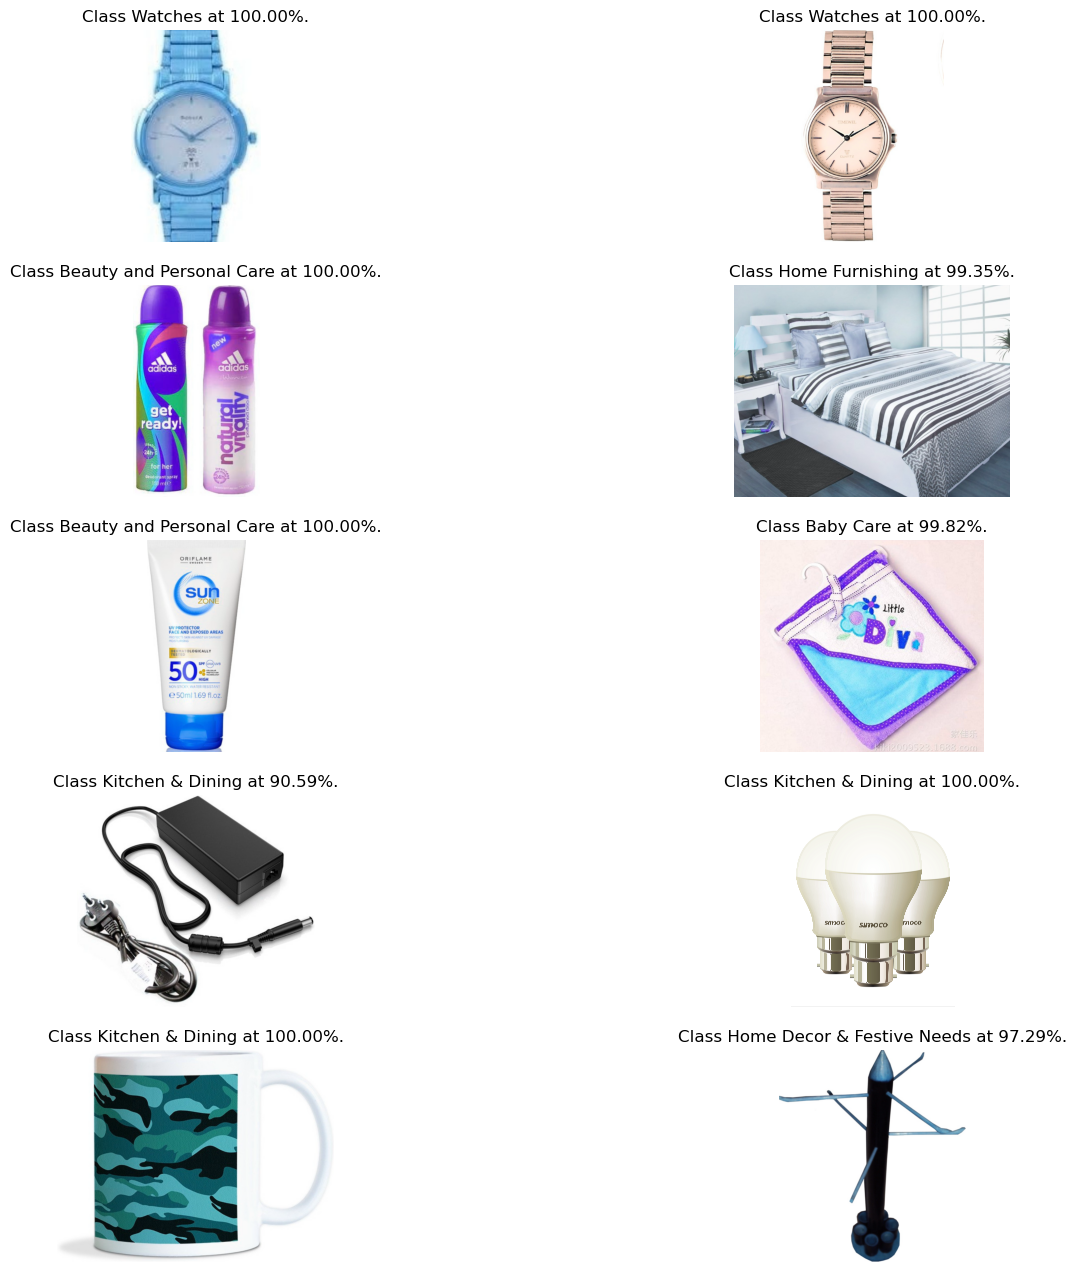

In [31]:
# Visualisation
plt.figure(figsize = (16,16))  # Crée une figure avec une taille spécifiée de 16x16 pouces pour l'affichage

# Boucle pour afficher les 10 premières images du jeu de test et leurs prédictions
for i in range(10):   
    ax = plt.subplot(5, 2, i + 1)  # Crée un sous-tracé avec 5 lignes et 2 colonnes. i+1 est le numéro du sous-tracé actuel

    # Lire l'image à l'aide de OpenCV. image_directory est probablement un chemin où les images sont stockées
    image = cv2.imread(image_directory + data_test.iloc[i]['image_path'])
    
    # Afficher l'image à l'aide de matplotlib
    plt.imshow(image)
    
    # Ajouter un titre à l'image. Il affiche la catégorie prédite et la confiance de la prédiction en pourcentage
    plt.title("Class {} at {:.2f}%.".format(categories[np.argmax(predictions1[i])], 100 * np.max(predictions1[i])))
    
    # Ne pas afficher les axes de l'image
    plt.axis("off")
    
# Sauvegarde de la figure avec les images visualisées sous le nom 'predicted1_images.png'
plt.savefig('predicted1_images.png')

## Approche ImageDatagenerator avec data augmentation

- Randomisation de l'ordre des images dans les données

In [13]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

- Génération des batches d'images pour l'entraînement du modèle à partir des données fournies

In [14]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory = image_directory,
                                x_col='image_path', y_col='product_category_tree',
                                weight_col=None, target_size=(224, 224),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow


- Préparation des générateurs de données d'entraînement, de validation et de test avec augmentation des données pour l'entraînement

In [15]:
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
    preprocessing_function=preprocess_input)

train_flow = data_flow_fct(data_train, datagen_train, data_type='training')
val_flow = data_flow_fct(data_train, datagen_train, data_type='validation')

datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

Found 630 validated image filenames belonging to 7 classes.
Found 210 validated image filenames belonging to 7 classes.
Found 210 validated image filenames belonging to 7 classes.


- Création du modèle et initialisation des callbacks

In [16]:
# Création du modèle
model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

- Entraînement du modèle et calcul du temps d'entraînement

In [17]:
temps2 = time.time()

history2 = model2.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=20, callbacks=callbacks_list, verbose=1)
duration2=time.time()-temps2

print("Temps d'entraînement du modèle : ", "%15.2f" % duration2, "secondes") 

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 4.1146 - accuracy: 0.4778
Epoch 1: val_loss improved from inf to 1.53889, saving model to .\model2_best_weights.h5
20/20 [==============================] - 208s 9s/step - loss: 4.1146 - accuracy: 0.4778 - val_loss: 1.5389 - val_accuracy: 0.6619


C:\Users\tidib\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 1.8358 - accuracy: 0.6857
Epoch 2: val_loss improved from 1.53889 to 1.46731, saving model to .\model2_best_weights.h5
20/20 [==============================] - 155s 8s/step - loss: 1.8358 - accuracy: 0.6857 - val_loss: 1.4673 - val_accuracy: 0.7095
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.1622 - accuracy: 0.7381
Epoch 3: val_loss improved from 1.46731 to 1.26202, saving model to .\model2_best_weights.h5
20/20 [==============================] - 153s 8s/step - loss: 1.1622 - accuracy: 0.7381 - val_loss: 1.2620 - val_accuracy: 0.7429
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 0.8583 - accuracy: 0.7905
Epoch 4: val_loss improved from 1.26202 to 1.06343, saving model to .\model2_best_weights.h5
20/20 [==============================] - 168s 8s/step - loss: 0.8583 - accuracy: 0.7905 - val_loss: 1.0634 - val_accuracy: 0.7667
Epoch 5/20
20/20 [==============================]

- Évaluation du modèle sur les données d'entraînement et de validation

In [37]:
loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

20/20 [==============================] - 134s 6s/step - loss: 0.0942 - accuracy: 0.9714
Training Accuracy   : 0.9714

7/7 [==============================] - 48s 6s/step - loss: 1.4611 - accuracy: 0.7524
Validation Accuracy :  0.7524


- Évaluation du modèle sur les données de validation et de test en utilisant les meilleurs poids sauvegardés

In [39]:
# Score de l'epoch optimal
model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.7524
Test Accuracy       :  0.7762


- Visualisation de la progression de l'apprentissage du modèle

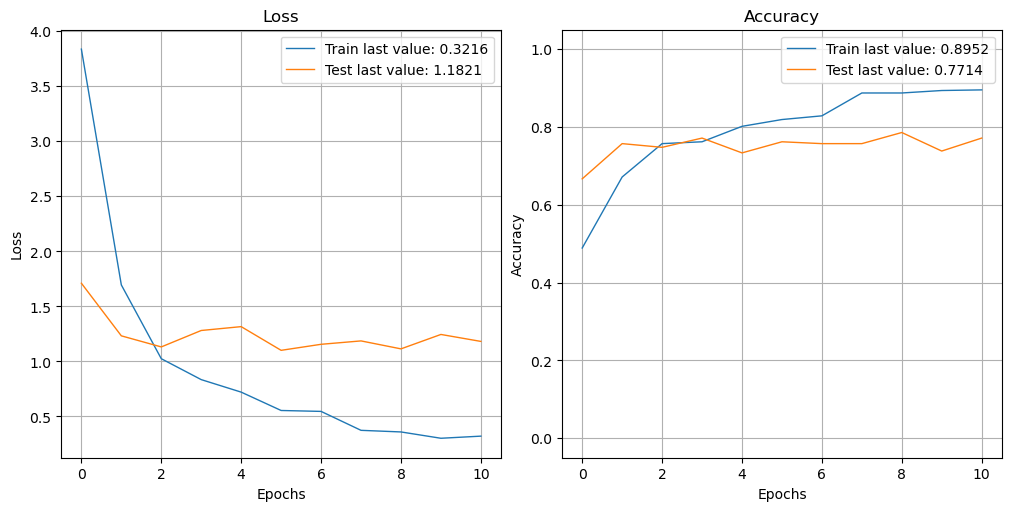

In [40]:
show_history(history2)
plot_history(history2, path="history2.png")
plt.close()

- Réaliser des prédictions avec le modèle sur l'ensemble de test

In [41]:
predictions2 = model2.predict(X_test)

7/7 [==============================] - 56s 7s/step


- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

In [39]:
labels_pred = [categories[np.argmax(predictions2[i])] for i in range(len(predictions2))]
labels = data_test['product_category_tree']
score2_ari = metrics.adjusted_rand_score(labels, labels_pred)
print("ARI : ", score2_ari)

ARI :  0.6004384877821193


## Approche nouvelle par Dataset sans data augmentation

- Création de sous repertoires de classes

In [ ]:
categories = ['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor & Festive Needs', 'Kitchen & Dining', 'Beauty and Personal Care', 'Computers']

# Pour chaque catégorie
#for category in categories:
    # Créez un sous-répertoire dans les répertoires d'entraînement et de test
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)
    
    # Déplacez les images de cette catégorie dans le sous-répertoire correspondant
    for image in train_list:  # Assurez-vous que train_list est la liste de vos images d'entraînement
        if image.startswith(category):  # Cela suppose que le nom de l'image commence par le nom de la catégorie
            shutil.move(os.path.join(train_dir, image), os.path.join(train_dir, category, image))
    
    for image in test_list:  # Assurez-vous que test_list est la liste de vos images de test
        if image.startswith(category):  # Cela suppose que le nom de l'image commence par le nom de la catégorie
            shutil.move(os.path.join(test_dir, image), os.path.join(test_dir, category, image))

- Réorganiser les images en les déplaçant dans des dossiers spécifiques

In [ ]:
# Réorganiser le dossier contenant les images d'entraînement
source_folder = train_dir
# Parcourir toutes les lignes du DataFrame flipkart_df
for index, row in flipkart_df.iterrows():
    # Récupérer le nom de l'image et sa catégorie
    image_name = row['uniq_id']
    categorie = row['product_category_tree']
    
    # Définir le chemin actuel de l'image et le chemin de destination
    source_path = os.path.join(source_folder, image_name + '.jpg')
    destination_path = os.path.join(source_folder, categorie, image_name + '.jpg')
    
    # Si l'image existe, la déplacer dans le dossier correspondant à sa catégorie
    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
        

        
# Réorganiser le dossier contenant les images de test
source_folder = test_dir
# Parcourir toutes les lignes du DataFrame flipkart_df
for index, row in flipkart_df.iterrows():
    # Récupérer le nom de l'image et sa catégorie
    image_name = row['uniq_id']
    categorie = row['product_category_tree']
    
    # Définir le chemin actuel de l'image et le chemin de destination
    source_path = os.path.join(source_folder, image_name + '.jpg')
    destination_path = os.path.join(source_folder, categorie, image_name + '.jpg')
    
    # Si l'image existe, la déplacer dans le dossier correspondant à sa catégorie
    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)      

- Récupération de la liste des images d'entraînement et de test à partir des répertoires spécifiés

In [21]:
train_dir = "./data/Flipkart/train_img/" 
test_dir = "./data/Flipkart/test_img/"  

# La liste des images
train_list = os.listdir(train_dir)
print((len(train_list)))

# La liste des images
test_list = os.listdir(test_dir)
print((len(test_list)))

7
7


- Génération d'un ensemble de données d'images à partir d'un répertoire

In [22]:
# Définir la taille de lot
batch_size = 32

# Définir une fonction pour générer un ensemble de données d'images à partir d'un répertoire
def dataset_fct(path, validation_split=0, data_type=None, data=data) :
    # Utiliser la fonction image_dataset_from_directory de TensorFlow pour lire les images à partir du répertoire spécifié
    # Redimensionner les images à 224x224 pixels (taille standard pour les modèles CNN pré-entraînés)
    # Mélanger les images (important pour l'entraînement des modèles d'apprentissage en profondeur)
    # Utiliser une fraction des images pour la validation, si spécifié
    # Créer des ensembles de données distincts pour l'entraînement et la validation, si spécifié
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, batch_size=32, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    # Renvoyer l'ensemble de données généré
    return dataset

- Création des ensembles de données d'entraînement, de validation et de test

In [23]:
dataset_train = dataset_fct(train_dir, validation_split=0.25, data_type='training', data = data_train)
dataset_val = dataset_fct(train_dir, validation_split=0.25, data_type='validation', data = data_train)
dataset_test = dataset_fct(test_dir, validation_split=0, data_type=None, data = data_test)

Found 840 files belonging to 7 classes.
Using 630 files for training.
Found 840 files belonging to 7 classes.
Using 210 files for validation.
Found 210 files belonging to 7 classes.


- Visualisation d'un échantillon de 16 images du jeu d'entraînement en grille 4x4

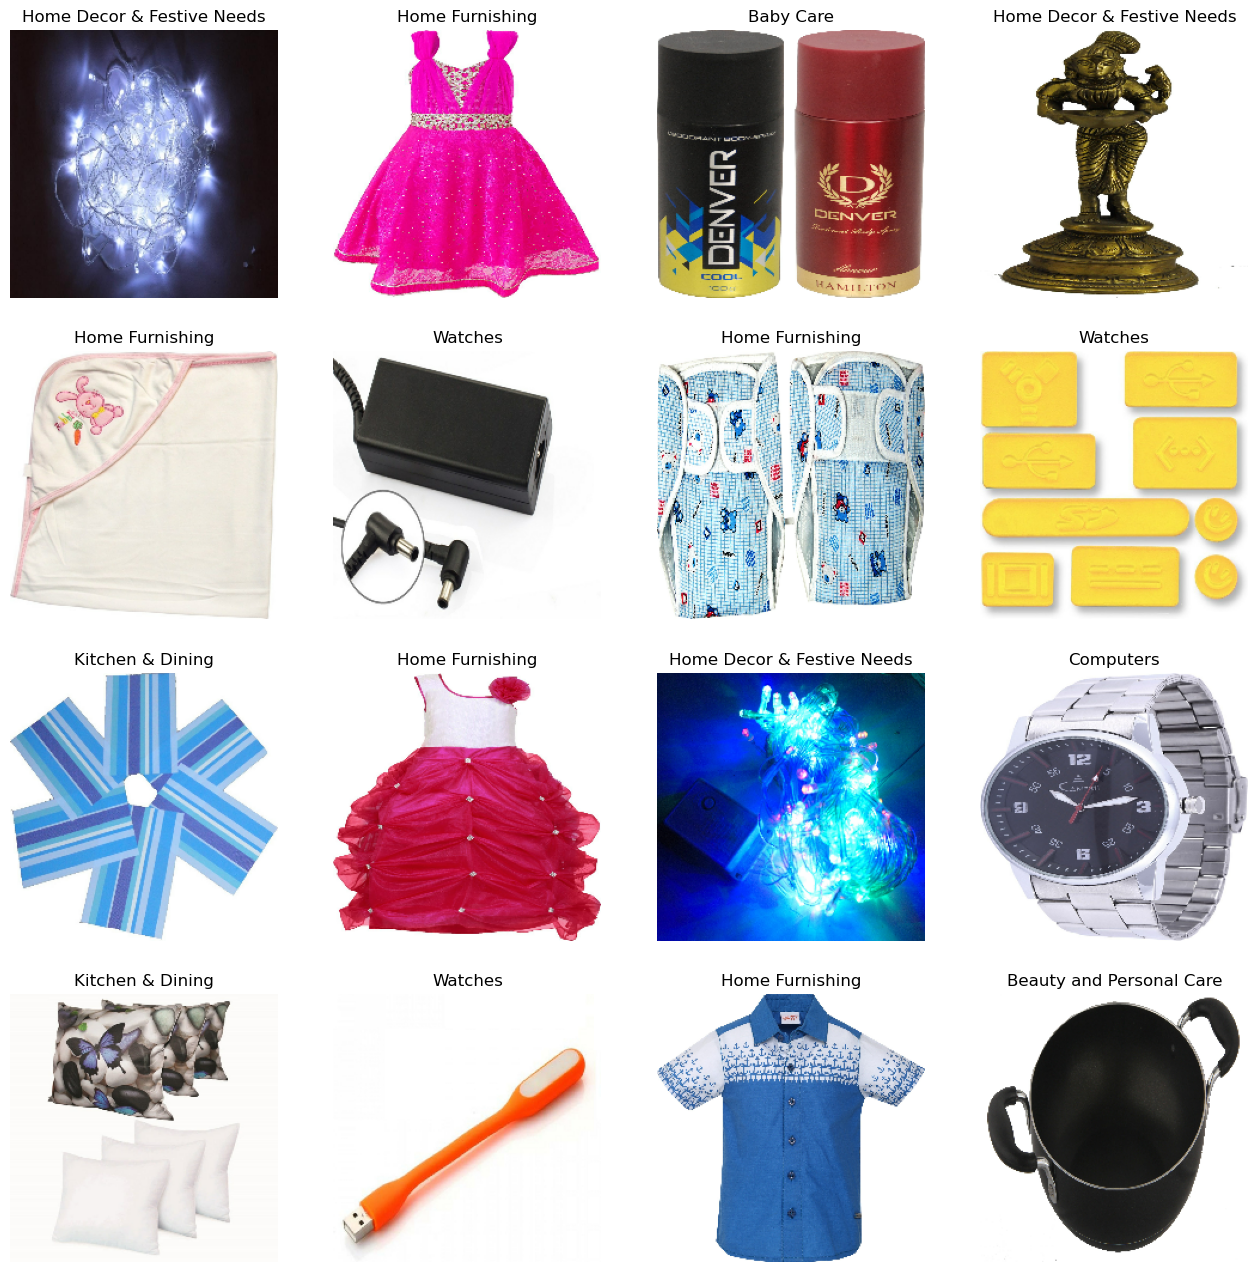

In [25]:
categories = ['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor & Festive Needs', 'Kitchen & Dining', 'Beauty and Personal Care', 'Computers']

plt.figure(figsize=(16, 16))
for images, labels in dataset_train.take(1):
    for i in range(16):    # Affiche 16 images 
        ax = plt.subplot(4, 4, i + 1)  # Réorganise les images en une grille de 4x4
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(categories[labels[i]])
        plt.axis("off")
        
plt.savefig('train_images.png')

- Création du modèle et initialisation des callbacks

In [26]:
# Création du modèle
model3 = create_model_fct()

# Création du callback
model3_save_path = "./model3_best_weights.h5"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

- Configurer le modèle pour l'entraînement

In [27]:
# Compiler le modèle en spécifiant l'optimiseur, la fonction de perte et les métriques à utiliser pour l'entraînement
model3.compile(
    optimizer='adam',  # Utiliser l'optimiseur Adam, qui est une méthode de descente de gradient stochastique adaptative largement utilisée
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Utiliser l'entropie croisée catégorielle sparse comme fonction de perte, appropriée pour les problèmes de classification multiclasse
    metrics=['accuracy']  # Suivre la précision comme métrique d'évaluation
)

- Entraîner le modèle en utilisant les données d'entraînement

In [28]:
temps3 = time.time()

# Entrainement du modèle sur les données d'entraînement et de validation pendant 20 époques.
history3 = model3.fit(
    dataset_train,  # Utiliser l'ensemble de données d'entraînement
    validation_data=dataset_val,  # Valider le modèle à l'aide de l'ensemble de données de validation
    batch_size=batch_size,  # Définir la taille du lot à 32
    epochs=20,  # Former le modèle pour 20 époques
    callbacks=callbacks_list,  # Utiliser les rappels que nous avons définis précédemment
    verbose=1  # Afficher une barre de progression pour chaque époque
)
duration3=time.time()-temps3

print("Temps d'entraînement du modèle : ", "%15.2f" % duration3, "secondes") 

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 6.7834 - accuracy: 0.4238
Epoch 1: val_loss improved from inf to 2.31398, saving model to .\model3_best_weights.h5
20/20 [==============================] - 120s 6s/step - loss: 6.7834 - accuracy: 0.4238 - val_loss: 2.3140 - val_accuracy: 0.7190
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 2.5087 - accuracy: 0.6921
Epoch 2: val_loss improved from 2.31398 to 1.99844, saving model to .\model3_best_weights.h5
20/20 [==============================] - 126s 6s/step - loss: 2.5087 - accuracy: 0.6921 - val_loss: 1.9984 - val_accuracy: 0.7524
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.6629 - accuracy: 0.7762
Epoch 3: val_loss improved from 1.99844 to 1.48326, saving model to .\model3_best_weights.h5
20/20 [==============================] - 127s 6s/step - loss: 1.6629 - accuracy: 0.7762 - val_loss: 1.4833 - val_accuracy: 0.7667
Epoch 4/20
20/20 [==============================] - E

- Évaluation du modèle sur les données d'entraînement et de validation

In [29]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

20/20 [==============================] - 92s 5s/step - loss: 0.0084 - accuracy: 0.9984
Training Accuracy   : 0.9984

7/7 [==============================] - 32s 4s/step - loss: 1.2907 - accuracy: 0.8048
Validation Accuracy :  0.8048


- Évaluation du modèle sur les données de validation et de test en utilisant les meilleurs poids sauvegardés

In [30]:
# Score de l'epoch optimal

model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.7762
Test Accuracy       :  0.8190


- Visualisation de la progression de l'apprentissage du modèle

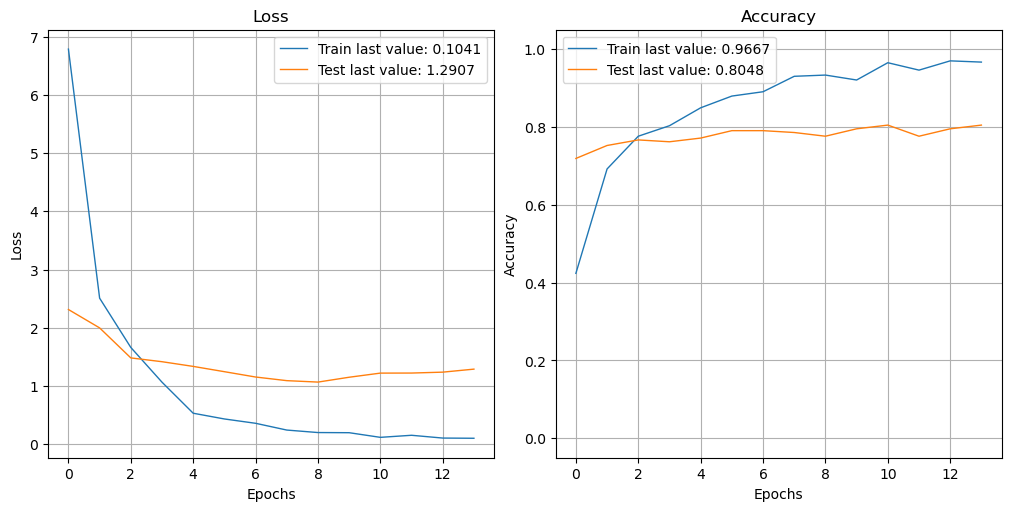

In [31]:
show_history(history3)
plot_history(history3, path="history3.png")
plt.close()

- Réaliser des prédictions avec le modèle sur l'ensemble de test

In [32]:
predictions3 = model3.predict(X_test)

7/7 [==============================] - 24s 3s/step


- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

In [33]:
labels_pred = [categories[np.argmax(predictions3[i])] for i in range(len(predictions3))]
labels = data_test['product_category_tree']
score3_ari = metrics.adjusted_rand_score(labels, labels_pred)
print("ARI : ", score3_ari)

ARI :  0.710411192245041


## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

- Redimensionnement et rééchelonnage des images

In [34]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

- Création du modèle avec augmentation des données et VGG16 comme base pré-entraînée

In [35]:
def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(7, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model

- Création du modèle et initialisation des callbacks

In [36]:
# Création du modèle
model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

- Entraîner le modèle en utilisant les données d'entraînement

In [37]:
temps4 = time.time()

history4 = model4.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=25, callbacks=callbacks_list, verbose=1)
duration4=time.time()-temps4

print("Temps d'entraînement du modèle : ", "%15.2f" % duration4, "secondes") 

Epoch 1/25
20/20 [==============================] - ETA: 0s - loss: 1.8870 - accuracy: 0.2571
Epoch 1: val_loss improved from inf to 1.42548, saving model to .\model4_best_weights.h5
20/20 [==============================] - 125s 6s/step - loss: 1.8870 - accuracy: 0.2571 - val_loss: 1.4255 - val_accuracy: 0.6714
Epoch 2/25


C:\Users\tidib\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - ETA: 0s - loss: 1.4016 - accuracy: 0.5540
Epoch 2: val_loss improved from 1.42548 to 1.10847, saving model to .\model4_best_weights.h5
20/20 [==============================] - 136s 7s/step - loss: 1.4016 - accuracy: 0.5540 - val_loss: 1.1085 - val_accuracy: 0.7143
Epoch 3/25
20/20 [==============================] - ETA: 0s - loss: 1.1550 - accuracy: 0.6476
Epoch 3: val_loss improved from 1.10847 to 0.97012, saving model to .\model4_best_weights.h5
20/20 [==============================] - 136s 7s/step - loss: 1.1550 - accuracy: 0.6476 - val_loss: 0.9701 - val_accuracy: 0.7476
Epoch 4/25
20/20 [==============================] - ETA: 0s - loss: 1.0341 - accuracy: 0.6667
Epoch 4: val_loss improved from 0.97012 to 0.87682, saving model to .\model4_best_weights.h5
20/20 [==============================] - 131s 7s/step - loss: 1.0341 - accuracy: 0.6667 - val_loss: 0.8768 - val_accuracy: 0.7524
Epoch 5/25
20/20 [==============================] - ETA: 0s 

- Évaluation du modèle sur les données d'entraînement et de validation

In [38]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

20/20 [==============================] - 90s 4s/step - loss: 0.3736 - accuracy: 0.8921
Training Accuracy   : 0.8921

7/7 [==============================] - 32s 4s/step - loss: 0.7127 - accuracy: 0.7476
Validation Accuracy :  0.7476


- Évaluation du modèle sur les données de validation et de test en utilisant les meilleurs poids sauvegardés

In [39]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.7619
Test Accuracy       :  0.8143


- Visualisation de la progression de l'apprentissage du modèle

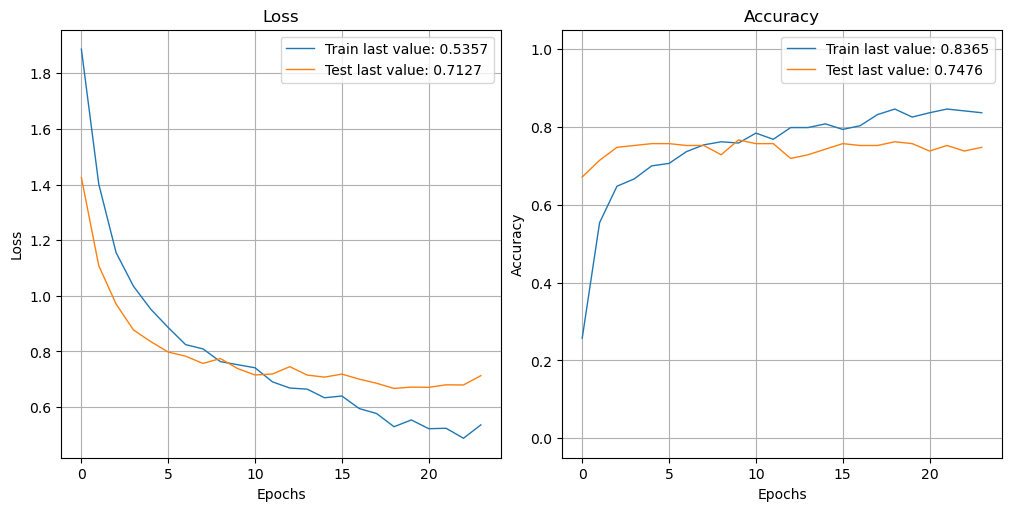

In [40]:
show_history(history4)
plot_history(history4, path="history4.png")
plt.close()

- Réaliser des prédictions avec le modèle sur l'ensemble de test

In [41]:
predictions4 = model4.predict(X_test)

7/7 [==============================] - 28s 4s/step


- Calculer le score ARI entre les prédictions du modèle et les vraies étiquettes de l'ensemble de test

In [42]:
labels_pred = [categories[np.argmax(predictions4[i])] for i in range(len(predictions4))]
labels = data_test['product_category_tree']
score4_ari = metrics.adjusted_rand_score(labels, labels_pred)
print("ARI : ", score4_ari)

ARI :  0.644574177373242


- Visualisation des prédictions du modèle sur 10 images de l'ensemble de test

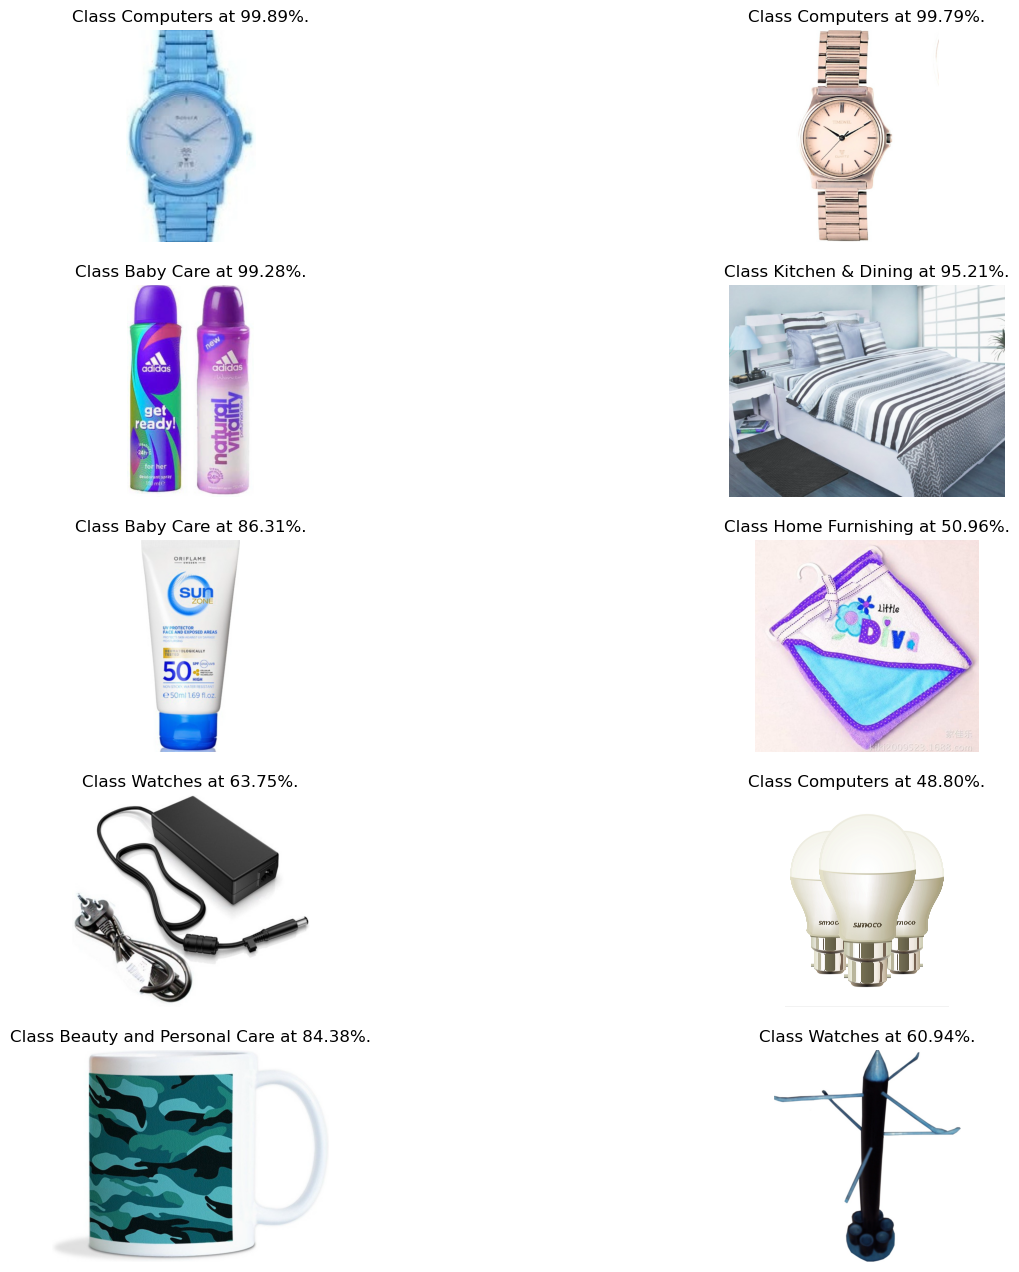

In [43]:
# Visualisation
plt.figure(figsize = (16,16))  # Adjust the figure size
for i in range(10):   # Increase the range to 10
    ax = plt.subplot(5, 2, i + 1)  # Adjust the subplot to have 5 rows and 2 columns
    image = cv2.imread(image_directory + data_test.iloc[i]['image_path'])
    plt.imshow(image)
    plt.title("Class {} at {:.2f}%.".format(categories[np.argmax(predictions4[i])], 100 * np.max(predictions4[i])))
    plt.axis("off")
    
plt.savefig('predicted4_images.png')